<a href="https://colab.research.google.com/github/Manggy94/PokerBrain/blob/master/Deep%20Learning%20Test%20file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Impor necessary files

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [67]:
!ls "/content/drive/MyDrive/PokerBrain"

API	  converter.py	  Game	    historyexample2.txt  __pycache__
assets	  Data		  Guesser   historyexample.txt	 storedfunctions.py
brain.py  DBManager	  history   main.py		 tf_tuto.py
Brains	  file_reader.py  history2  PokerBrain		 winamax.py


In [68]:
import sys
import os
sys.path.append('/content/drive/MyDrive/PokerBrain/PokerBrain')

In [69]:
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.model_selection as select
from API.timer import Timer
from preprocessor import Preprocessor
pp = Preprocessor()

In [70]:
pp.conv.parser.root = f"{os.getcwd()}/drive/MyDrive/PokerBrain/PokerBrain"
hands = pp.conv.load_hands()
X, y = pp.create_vectors(hands)
hands.to_csv('/content/drive/MyDrive/PokerBrain/Data/data_tab.csv')
X.to_csv('/content/drive/MyDrive/PokerBrain/Data/features_tab.csv')
y.to_csv('/content/drive/MyDrive/PokerBrain/Data/labels_tab.csv')
hands



,hand,hand_id,tour_id,table_id,level,bb,ante,max_pl,btn,buyin,hero_combo,hero_first_suit,hero_second_suit,hero_first_rank,hero_second_rank,hero_seat,P0_name,P0_stack,P0_seat,P0_position,P0_combo,P0_hand,P0_action_0_street,P0_action_0_move,P0_action_0_value,P0_action_1_street,P0_action_1_move,P0_action_1_value,P0_action_2_street,P0_action_2_move,P0_action_2_value,P0_action_3_street,P0_action_3_move,P0_action_3_value,P0_action_4_street,P0_action_4_move,P0_action_4_value,P0_action_5_street,P0_action_5_move,P0_action_5_value,...,P8_hand,P8_action_0_street,P8_action_0_move,P8_action_0_value,P8_action_1_street,P8_action_1_move,P8_action_1_value,P8_action_2_street,P8_action_2_move,P8_action_2_value,P8_action_3_street,P8_action_3_move,P8_action_3_value,P8_action_4_street,P8_action_4_move,P8_action_4_value,P8_action_5_street,P8_action_5_move,P8_action_5_value,P8_action_6_street,P8_action_6_move,P8_action_6_value,P8_action_7_street,P8_action_7_move,P8_action_7_value,Card_0,Card_0_rank,Card_0_suit,Card_1,Card_1_rank,Card_1_suit,Card_2,Card_2_rank,Card_2_suit,Card_3,Card_3_rank,Card_3_suit,Card_4,Card_4_rank,Card_4_suit
0,Hand_id: 870849712125640736-38-1501708774\n\nT...,870849712125640736-38-1501708774,202760499,031,10,1000.0,120.0,6,1,5.0,Jh3h,h,h,J,3,5,jimdoors,16141.0,1,BTN,None,None,PreFlop,fold,0,None,None,0,None,None,0,None,None,0,None,None,0,None,None,0,...,None,None,None,0,None,None,0,None,None,0,None,None,0,None,None,0,None,None,0,None,None,0,None,None,0,5s,5,s,3d,3,d,Ac,A,c,None,None,None,None,None,None
1,Hand_id: 870849712125640736-39-1501708822\n\nT...,870849712125640736-39-1501708822,202760499,031,11,1200.0,160.0,6,2,5.0,Kc7s,c,s,K,7,5,jimdoors,16021.0,1,CO,None,None,PreFlop,fold,0,None,None,0,None,None,0,None,None,0,None,None,0,None,None,0,...,None,None,None,0,None,None,0,None,None,0,None,None,0,None,None,0,None,None,0,None,None,0,None,None,0,7h,7,h,Qs,Q,s,4c,4,c,None,None,None,None,None,None
2,Hand_id: 870849712125640736-40-1501708884\n\nT...,870849712125640736-40-1501708884,202760499,031,11,1200.0,160.0,6,3,5.0,Qd8c,d,c,Q,8,5,jimdoors,15861.0,1,HJ,None,None,PreFlop,fold,0,None,None,0,None,None,0,None,None,0,None,None,0,None,None,0,...,None,None,None,0,None,None,0,None,None,0,None,None,0,None,None,0,None,None,0,None,None,0,None,None,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,Hand_id: 870849712125640736-41-1501708923\n\nT...,870849712125640736-41-1501708923,202760499,031,11,1200.0,160.0,6,4,5.0,AdJh,d,h,A,J,5,jimdoors,15701.0,1,UTG,None,None,PreFlop,fold,0,None,None,0,None,None,0,None,None,0,None,None,0,None,None,0,...,None,None,None,0,None,None,0,None,None,0,None,None,0,None,None,0,None,None,0,None,None,0,None,None,0,9c,9,c,7h,7,h,5h,5,h,4h,4,h,5c,5,c
4,Hand_id: 860532796953723152-1-1499424158\n\nTo...,860532796953723152-1-1499424158,200358405,271,0,80.0,10.0,8,2,5.0,9s2c,s,c,9,2,3,TED60,3000.0,1,CO,None,None,None,None,0,None,None,0,None,None,0,None,None,0,None,None,0,None,None,0,...,None,None,None,0,None,None,0,None,None,0,None,None,0,None,None,0,None,None,0,None,None,0,None,None,0,Kd,K,d,8h,8,h,3d,3,d,Td,T,d,3s,3,s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20235,Hand_id: 546663076657627655-42-1440620291\n\nT...,546663076657627655-42-1440620291,127279916,0518,19,2500.0,250.0,9,2,0.0,Ad6c,d,c,A,6,5,AOUNETTE76,13225.0,1,CO,Th8h,T8s,PreFlop,call,12975,None,None,0,None,None,0,None,None,0,None,None,0,None,None,0,...,None,PreFlop,fold,0,None,None,0,None,None,0,None,None,0,None,None,0,None,None,0,None,None,0,None,None,0,7h,7,h,9s,9,s,3h,3,h,Ks,K,s,Kh,K,h
20236,Hand_id: 546663076657627655-43-1440620355\n\nT...,546663076657627655-43-1440620355,127279916,0518,19,2500.0,250.0,9,3,0.0,Kh8s,h,s,K,8,5,AOUNETTE76,31950.0

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv("/content/drive/MyDrive/PokerBrain/Data/data_tab.csv", index_col=0)
features = pd.read_csv("/content/drive/MyDrive/PokerBrain/Data/features_tab.csv", index_col=0)
labels = pd.read_csv("/content/drive/MyDrive/PokerBrain/Data/labels_tab.csv", index_col=0)

In [72]:
data.shape

(20230, 301)

In [73]:
features.shape

(24940, 280)

In [74]:
labels.shape

(24940, 1)

In [75]:
X, y = pp.X_transformer.fit_transform(features), pp.y_transformer.fit_transform(labels)


In [76]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [77]:
labels.shape, y.shape

((24940, 1), (24940, 169))

In [ ]:
selector = SelectKBest(f_classif, k=150)
selector.fit_transform(X, labels)
filter = selector.get_support()
ft_filter = features.columns[filter].to_numpy()
features = features[ft_filter]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 86  96 263 264] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [78]:
t1 = Timer()
t1.start()
t2 = Timer()
t2.start()
print("Data Preparation")
features, targets = pp.X_transformer.fit_transform(features), pp.y_transformer.fit_transform(labels)
t1.stop()
print(features.shape, targets.shape)
train_set, test_set, train_tgts, test_tgts = select.train_test_split(features, targets, test_size=0.2, random_state=1)
print(train_set.shape, train_tgts.shape)
print(test_set.shape, test_tgts.shape)
print("Data is compeletely Ready")
t2.stop()

Data Preparation
Temps d'execution: 1.526253e+00 s
(24940, 280) (24940, 169)
(19952, 280) (19952, 169)
(4988, 280) (4988, 169)
Data is compeletely Ready
Temps d'execution: 1.556596e+00 s


# Create the model
## Model Creation

In [80]:
model = tf.keras.models.Sequential()

# Add layers
model.add(tf.keras.Input(shape=(features.shape[1],)))
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(192, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(targets.shape[1], activation="softmax"))

# print("Shape of img",  images[0:1].shape)
# print(model_output, targets[0:1])
model.summary()

# Compile the model
model.compile(
    loss="categorical_crossentropy",
    optimizer="sgd",
    metrics=["categorical_accuracy", tf.keras.metrics.top_k_categorical_accuracy],
    run_eagerly=True
)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               71936     
_________________________________________________________________
dense_17 (Dense)             (None, 192)               49344     
_________________________________________________________________
dense_18 (Dense)             (None, 128)               24704     
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_21 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_22 (Dense)             (None, 64)               

In [81]:
# Train the model
t3 = Timer()
t3.start()
history = model.fit(train_set, train_tgts, epochs=40, validation_split=0.2)
t3.stop()
print("Model is ready")

Epoch 1/40
499/499 [==============================] - 19s 38ms/step - loss: 5.1233 - categorical_accuracy: 0.0132 - top_k_categorical_accuracy: 0.0504 - val_loss: 5.1118 - val_categorical_accuracy: 0.0200 - val_top_k_categorical_accuracy: 0.0694
Epoch 2/40
499/499 [==============================] - 18s 37ms/step - loss: 5.1011 - categorical_accuracy: 0.0221 - top_k_categorical_accuracy: 0.0836 - val_loss: 5.0912 - val_categorical_accuracy: 0.0208 - val_top_k_categorical_accuracy: 0.0879
Epoch 3/40
499/499 [==============================] - 17s 35ms/step - loss: 5.0726 - categorical_accuracy: 0.0236 - top_k_categorical_accuracy: 0.0907 - val_loss: 5.0559 - val_categorical_accuracy: 0.0213 - val_top_k_categorical_accuracy: 0.0874
Epoch 4/40
499/499 [==============================] - 18s 35ms/step - loss: 5.0161 - categorical_accuracy: 0.0237 - top_k_categorical_accuracy: 0.0965 - val_loss: 4.9964 - val_categorical_accuracy: 0.0205 - val_top_k_categorical_accuracy: 0.0935
Epoch 5/40
499/4

In [85]:
loss_curve = np.array(history.history["loss"])
acc_curve = np.array(history.history["categorical_accuracy"])
top_k_curve = np.array(history.history['top_k_categorical_accuracy'])
loss_val_curve = np.array(history.history["val_loss"])
acc_val_curve = np.array(history.history["val_categorical_accuracy"])
top_k_val_curve = np.array(history.history['val_top_k_categorical_accuracy'])
overfitting = np.abs(loss_curve - loss_val_curve)/loss_val_curve*100
loss_val_curve.argmin()
print(f"On a un minimum d'overfiting sur le test set sur la {loss_val_curve.argmin()}e époque, à {round(acc_val_curve[loss_val_curve.argmin()]*100,2)}%")


On a un minimum d'overfiting sur le test set sur la 24e époque, à 2.38%


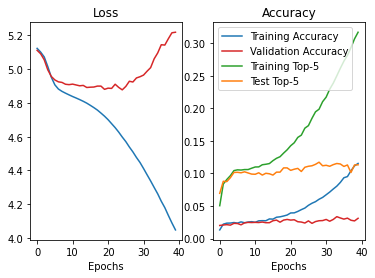

In [83]:
fig, axs = plt.subplots(1, 2)

axs[0].plot(loss_curve, color='tab:blue', label="Training Loss")
axs[0].plot(loss_val_curve, color='tab:red', label="Validation Loss")
axs[0].set_title("Loss")
axs[0].set_xlabel("Epochs")

axs[1].plot(acc_curve, color='tab:blue', label="Training Accuracy")
axs[1].set_title("Accuracy")
axs[1].set_xlabel("Epochs")
axs[1].plot(acc_val_curve, color='tab:red', label="Validation Accuracy")
axs[1].plot(top_k_curve, color='tab:green', label="Training Top-5")
axs[1].plot(top_k_val_curve, color='tab:orange', label="Test Top-5")
plt.legend(loc='upper left')
plt.show()


## Evaluation du Test Set

In [86]:
results = model.evaluate(test_set, test_tgts, batch_size=20)
print(f"test loss: {round(results[0],4)}, test acc: {round(results[1]*100,2)}%, top-5-accuracy: {round(results[2]*100, 2)}%")
accuracy, top5acc = results[1], results[2]
results

250/250 [==============================] - 5s 19ms/step - loss: 5.2252 - categorical_accuracy: 0.0271 - top_k_categorical_accuracy: 0.1067
test loss: 5.2252, test acc: 2.71%, top-5-accuracy: 10.67%


[5.225247859954834, 0.027064956724643707, 0.10665597766637802]

[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]


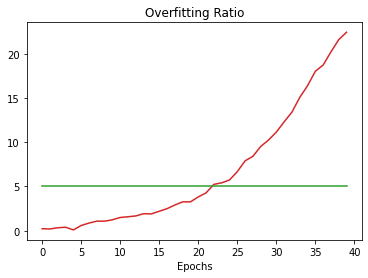

In [87]:
overfitting = np.abs(loss_curve - loss_val_curve)/loss_val_curve*100
limit = 5*np.ones(overfitting.shape[0])
print(limit)
plt.plot(overfitting, color='tab:red', label="Overfitting ratio")
plt.title("Overfitting Ratio")
plt.xlabel("Epochs")
plt.plot(limit, color = "tab:green")
plt.show()